In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# The %matplotlib inline command tells the IPython environment to draw the plots immediately after the current cell.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Dataset/loan_prediction.csv"

In [ ]:
data = pd.read_csv(path)

Loan_ID : Unique Loan ID

Gender : Male/ Female

Married : Applicant married (Y/N)

Dependents : Number of dependents

Education : Applicant Education (Graduate/ Under Graduate)

Self_Employed : Self employed (Y/N)

ApplicantIncome : Applicant income

CoapplicantIncome : Coapplicant income

LoanAmount : Loan amount in thousands of dollars

Loan_Amount_Term : Term of loan in months

Credit_History : Credit history meets guidelines yes or no

Property_Area : Urban/ Semi Urban/ Rural

Loan_Status : Loan approved (Y/N) this is the target variable


### 1. Display Top 5 Rows of The Dataset


In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### 2. Check Last 5 Rows of The Dataset

In [ ]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


### 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [ ]:
data.shape

(614, 13)

In [ ]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 614
Number of Columns 13


### 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### 5. Check Null Values In The Dataset


In [ ]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
data.isnull().sum()*100 / len(data)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

### 6. Handling The missing Values

In [ ]:
data = data.drop('Loan_ID',axis=1)

In [ ]:
data.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [ ]:
columns = ['Gender','Dependents','LoanAmount','Loan_Amount_Term']

In [ ]:
data = data.dropna(subset=columns)

In [ ]:
data.isnull().sum()*100 / len(data)

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        5.424955
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [ ]:
data['Self_Employed'].mode()[0]

'No'

In [ ]:
data['Self_Employed'] =data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

<ipython-input-23-17abb0b5e377>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Self_Employed'] =data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])


In [ ]:
data.isnull().sum()*100 / len(data)

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [ ]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
data['Credit_History'].mode()[0]

1.0

In [ ]:
data['Credit_History'] =data['Credit_History'].fillna(data['Credit_History'].mode()[0])

<ipython-input-28-f7e9bf1bdb52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Credit_History'] =data['Credit_History'].fillna(data['Credit_History'].mode()[0])


In [ ]:
data.isnull().sum()*100 / len(data)

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

### 7. Handling Categorical Columns

In [ ]:
data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
372,Male,Yes,2,Graduate,Yes,9323,7873.0,380.0,300.0,1.0,Rural,Y
331,Male,No,0,Graduate,No,2935,0.0,98.0,360.0,1.0,Semiurban,Y
485,Male,Yes,1,Not Graduate,No,1958,2436.0,131.0,360.0,1.0,Rural,Y
486,Male,No,2,Graduate,No,3547,0.0,80.0,360.0,0.0,Rural,N
292,Male,Yes,2,Graduate,No,3153,1560.0,134.0,360.0,1.0,Urban,Y


In [ ]:
data['Dependents'] = data['Dependents'].replace(to_replace="3+",value='4')

In [ ]:
data['Dependents'].unique()

array(['1', '0', '2', '4'], dtype=object)

In [ ]:
data['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
data['Gender'] = data['Gender'].map({'Male':1,'Female':0}).astype('int')
data['Married'] = data['Married'].map({'Yes':1,'No':0}).astype('int')
data['Education'] = data['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
data['Self_Employed'] = data['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
data['Property_Area'] = data['Property_Area'].map({'Rural':0,'Semiurban':2,'Urban':1}).astype('int')
data['Loan_Status'] = data['Loan_Status'].map({'Y':1,'N':0}).astype('int')

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


### 8. Store Feature Matrix In X And Response (Target) In Vector y

In [ ]:
X = data.drop('Loan_Status',axis=1)

In [ ]:
y = data['Loan_Status']

In [ ]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 553, dtype: int64

### 9. Feature Scaling

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [ ]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [ ]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X[cols]=st.fit_transform(X[cols])

In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,-0.128694,-0.049699,-0.214368,0.279961,1.0,0
2,1,1,0,1,1,-0.394296,-0.545638,-0.952675,0.279961,1.0,1
3,1,1,0,0,0,-0.464262,0.229842,-0.309634,0.279961,1.0,1
4,1,0,0,1,0,0.109057,-0.545638,-0.059562,0.279961,1.0,1
5,1,1,2,1,1,0.011239,0.834309,1.440866,0.279961,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,-0.411075,-0.545638,-0.893134,0.279961,1.0,0
610,1,1,4,1,0,-0.208727,-0.545638,-1.262287,-2.468292,1.0,0
611,1,1,1,1,0,0.456706,-0.466709,1.274152,0.279961,1.0,1
612,1,1,2,1,0,0.374659,-0.545638,0.488213,0.279961,1.0,1


### 10. Splitting The Dataset Into The Training Set And Test Set & Applying K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
model_df={}
def model_val(model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,
                                                   test_size=0.20,
                                                   random_state=42)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"{model} accuracy is {accuracy_score(y_test,y_pred)}")

    score = cross_val_score(model,X,y,cv=5)
    print(f"{model} Avg cross val score is {np.mean(score)}")
    model_df[model]=round(np.mean(score)*100,2)

In [ ]:
model_df

{}

### 11. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model_val(model,X,y)

# make prediction using model predict method
y_pred_logistic = model.predict(X)

LogisticRegression() accuracy is 0.8018018018018018
LogisticRegression() Avg cross val score is 0.8047829647829647


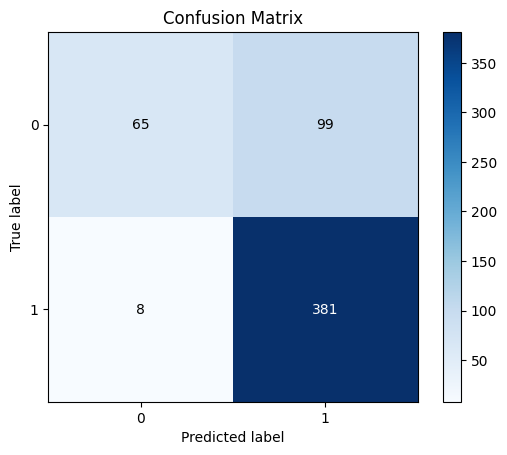

In [ ]:
# import confusion matrix
from sklearn.metrics import confusion_matrix

# confusion matrix in more standard form
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y, y_pred_logistic);

### Classification Report (Precision, Recall, F1-Score)

In [ ]:
# see the classification report
# containing model accuracy, precision, recall, F1-score etc
from sklearn.metrics import classification_report
print(classification_report(y, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.89      0.40      0.55       164
           1       0.79      0.98      0.88       389

    accuracy                           0.81       553
   macro avg       0.84      0.69      0.71       553
weighted avg       0.82      0.81      0.78       553



### 12. SVC

In [ ]:
from sklearn import svm
model = svm.SVC()
model_val(model,X,y)

# make prediction using model predict method
y_pred_SVC = model.predict(X)

SVC() accuracy is 0.7927927927927928
SVC() Avg cross val score is 0.7938902538902539


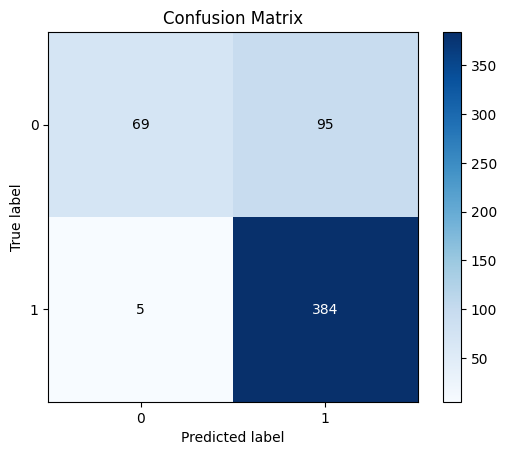

In [ ]:
# import confusion matrix
from sklearn.metrics import confusion_matrix

# confusion matrix in more standard form
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y, y_pred_SVC);

### Classification Report (Precision, Recall, F1-Score)

In [ ]:
# see the classification report
# containing model accuracy, precision, recall, F1-score etc
from sklearn.metrics import classification_report
print(classification_report(y, y_pred_SVC))

              precision    recall  f1-score   support

           0       0.93      0.42      0.58       164
           1       0.80      0.99      0.88       389

    accuracy                           0.82       553
   macro avg       0.87      0.70      0.73       553
weighted avg       0.84      0.82      0.79       553



### 13. Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_val(model,X,y)

# make prediction using model predict method
y_pred_DT = model.predict(X)

DecisionTreeClassifier() accuracy is 0.7387387387387387
DecisionTreeClassifier() Avg cross val score is 0.708927108927109


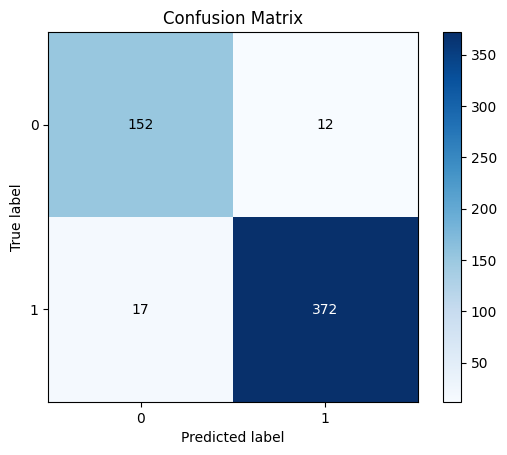

In [ ]:
# import confusion matrix
from sklearn.metrics import confusion_matrix

# confusion matrix in more standard form
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y, y_pred_DT);

### Classification Report (Precision, Recall, F1-Score)

In [ ]:
# see the classification report
# containing model accuracy, precision, recall, F1-score etc
from sklearn.metrics import classification_report
print(classification_report(y, y_pred_DT))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       164
           1       0.97      0.96      0.96       389

    accuracy                           0.95       553
   macro avg       0.93      0.94      0.94       553
weighted avg       0.95      0.95      0.95       553



### 14. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier()
model_val(model,X,y)

# make prediction using model predict method
y_pred_RF = model.predict(X)

print("Testing Accuracy: ","{:.2f}%".format(accuracy_score(y,y_pred_RF)))

RandomForestClassifier() accuracy is 0.7747747747747747
RandomForestClassifier() Avg cross val score is 0.7884520884520885
Testing Accuracy:  0.95%


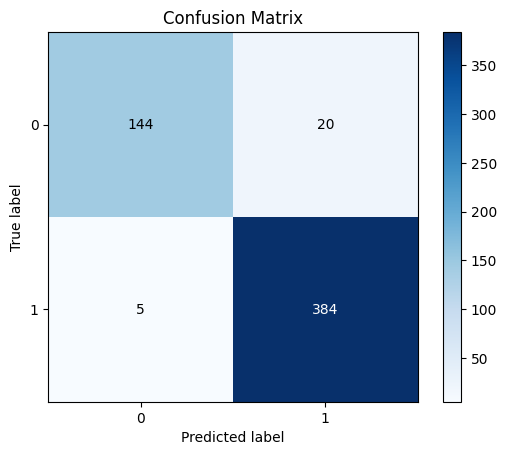

In [ ]:
# import confusion matrix
from sklearn.metrics import confusion_matrix

# confusion matrix in more standard form
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y, y_pred_RF);

### Classification Report (Precision, Recall, F1-Score)

In [ ]:
# see the classification report
# containing model accuracy, precision, recall, F1-score etc
from sklearn.metrics import classification_report
print(classification_report(y, y_pred_RF))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       164
           1       0.95      0.99      0.97       389

    accuracy                           0.95       553
   macro avg       0.96      0.93      0.94       553
weighted avg       0.96      0.95      0.95       553



### 15. Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model =GradientBoostingClassifier()
model_val(model,X,y)

# make prediction using model predict method
y_pred_GB = model.predict(X)

GradientBoostingClassifier() accuracy is 0.7927927927927928
GradientBoostingClassifier() Avg cross val score is 0.7758067158067158


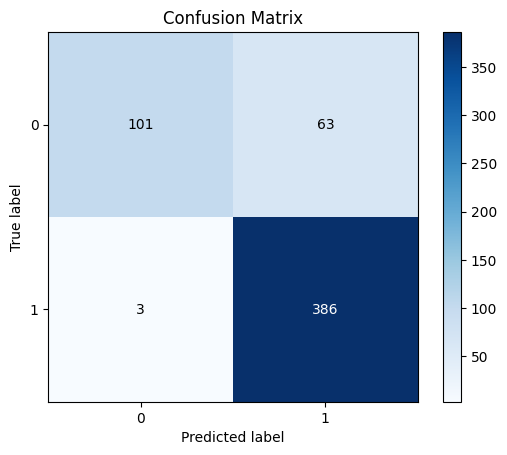

In [ ]:
# import confusion matrix
from sklearn.metrics import confusion_matrix

# confusion matrix in more standard form
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y, y_pred_GB);

### Classification Report (Precision, Recall, F1-Score)

In [ ]:
# see the classification report
# containing model accuracy, precision, recall, F1-score etc
from sklearn.metrics import classification_report
print(classification_report(y, y_pred_GB))

              precision    recall  f1-score   support

           0       0.97      0.62      0.75       164
           1       0.86      0.99      0.92       389

    accuracy                           0.88       553
   macro avg       0.92      0.80      0.84       553
weighted avg       0.89      0.88      0.87       553



### 16. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model_val(model,X,y)

# make prediction using model predict method
y_pred_knn = model.predict(X)

KNeighborsClassifier() accuracy is 0.7117117117117117
KNeighborsClassifier() Avg cross val score is 0.7341523341523342


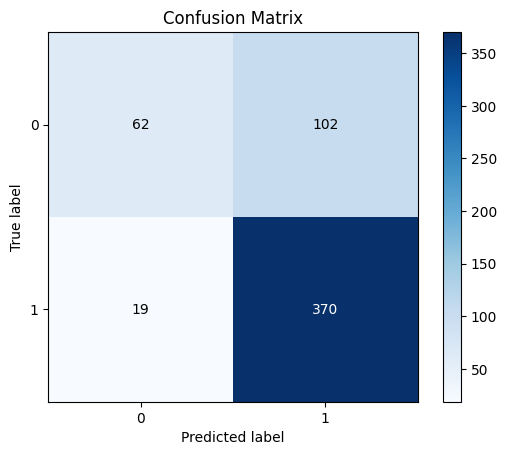

In [ ]:
# import confusion matrix
from sklearn.metrics import confusion_matrix

# confusion matrix in more standard form
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y, y_pred_knn);

### Classification Report (Precision, Recall, F1-Score)

In [ ]:
# see the classification report
# containing model accuracy, precision, recall, F1-score etc
from sklearn.metrics import classification_report
print(classification_report(y, y_pred_knn))

              precision    recall  f1-score   support

           0       0.77      0.38      0.51       164
           1       0.78      0.95      0.86       389

    accuracy                           0.78       553
   macro avg       0.77      0.66      0.68       553
weighted avg       0.78      0.78      0.75       553



### 17. Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

### Logistic Regression

In [ ]:
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":['liblinear']}

In [ ]:
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                   param_distributions=log_reg_grid,
                  n_iter=20,cv=5,verbose=True)

In [ ]:
rs_log_reg.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_score_

0.8047829647829647

In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

### SVC

In [ ]:
svc_grid = {'C':[0.25,0.50,0.75,1],"kernel":["linear"]}

In [ ]:
rs_svc=RandomizedSearchCV(svm.SVC(),
                  param_distributions=svc_grid,
                   cv=5,
                   n_iter=20,
                  verbose=True)

In [ ]:
rs_svc.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1],
                                        'kernel': ['linear']},
                   verbose=True)

In [ ]:
rs_svc.best_score_

# make prediction using model predict method
y_pred_rs_svc = model.predict(X)

# import accuracy score for measuring the model
from sklearn.metrics import accuracy_score

# measure the accuracy
acc_random = accuracy_score(y,y_pred_rs_svc)
print("Accuracy: ","{:.2f}%".format(acc_random))

Accuracy:  0.78%


In [ ]:
rs_svc.best_params_

{'kernel': 'linear', 'C': 0.25}

###  Random Forest Classifier

In [ ]:
rf_grid={'n_estimators':np.arange(10,1000,10),
 'max_depth':[None,3,5,10,20,30],
 'min_samples_split':[2,5,20,50,100],
 'min_samples_leaf':[1,2,5,10]
 }

In [ ]:
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                  param_distributions=rf_grid,
                   cv=5,
                   n_iter=20,
                  verbose=True)

In [ ]:
rs_rf.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 20, 50,
                                                              100],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990])},
                   verbose=True)

In [ ]:
rs_rf.best_score_

# make prediction using model predict method
y_pred_rs_rf = model.predict(X)

# import accuracy score for measuring the model
from sklearn.metrics import accuracy_score

# measure the accuracy
acc_random = accuracy_score(y,y_pred_rs_rf)
print("Accuracy: ","{:.2f}%".format(acc_random))

Accuracy:  0.78%


In [ ]:
rs_rf.best_params_

{'n_estimators': 490,
 'min_samples_split': 50,
 'min_samples_leaf': 1,
 'max_depth': 20}

LogisticRegression score Before Hyperparameter Tuning: 80.48

LogisticRegression score after Hyperparameter Tuning: 80.48
    
------------------------------------------------------
SVC score Before Hyperparameter Tuning: 79.39

SVC score after Hyperparameter Tuning: 80.66
    
--------------------------------------------------------
RandomForestClassifier score Before Hyperparameter Tuning: 76.67

RandomForestClassifier score after Hyperparameter Tuning: 80.67


### 17. Save The Model

In [ ]:
X = data.drop('Loan_Status',axis=1)
y = data['Loan_Status']

In [ ]:
rf = RandomForestClassifier(n_estimators=270,
 min_samples_split=5,
 min_samples_leaf=5,
 max_features='sqrt',
 max_depth=5)

In [ ]:
rf.fit(X,y)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=270)

In [ ]:
import joblib

In [ ]:
joblib.dump(rf,'loan_status_predict')

['loan_status_predict']

In [ ]:
model = joblib.load('loan_status_predict')

In [ ]:
import pandas as pd
df = pd.DataFrame({
    'Gender':1,
    'Married':1,
    'Dependents':2,
    'Education':0,
    'Self_Employed':0,
    'ApplicantIncome':4500,
    'CoapplicantIncome':0.0,
    'LoanAmount':45,
    'Loan_Amount_Term':180,
    'Credit_History':1,
    'Property_Area':1
},index=[0])

In [ ]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,2,0,0,4500,0.0,45,180,1,1


In [ ]:
result = model.predict(df)

In [ ]:
if result==1:
    print("Loan Approved")
else:
    print("Loan Not Approved")

Loan Approved
